In [140]:
import sys
!{sys.executable} -m pip install -r requeriments.txt


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [141]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/raw_customers.csv')
df.shape
df.head()

,Unnamed: 0,CustomerId,PipedriveId,ContractStartDateUtc,ContractEndDateUtc,FirstPlanVariantId,Churned,NumberOfDaysActive,AmountTasksPerMonth,AmountTasksLastMonth
0,4,6065cec2d779105ba458ab95,7732.0,2021-04-01 13:46:42+00:00,2021-08-01 13:46:42+00:00,Pro Plan,Yes,122,1.475410,0
1,9,604741393f5db5c822d3dabe,7609.0,2021-03-09 09:34:49+00:00,2021-09-24 08:34:49+00:00,WeightBet,Yes,198,0.151515,0
2,18,5f07172a34f3e71ce43e58a1,32.0,2020-05-20 22:00:00+00:00,2022-04-01 00:00:00+00:00,Pro Plan,No,680,3.617647,9
3,20,5f07040f70e5571360ac3168,20.0,2020-05-04 22:00:00+00:00,2022-04-01 00:00:00+00:00,Pro Plan,No,696,2.112069,8
4,23,5f0723f970e5571360ae980a,27.0,2020-05-23 22:00:00+00:00,2022-04-01 00:00:00+00:00,Pro Plan,No,677,0.398818,5


In [142]:
df.isna().sum()

Unnamed: 0              0
CustomerId              0
PipedriveId             0
ContractStartDateUtc    0
ContractEndDateUtc      0
FirstPlanVariantId      0
Churned                 0
NumberOfDaysActive      0
AmountTasksPerMonth     0
AmountTasksLastMonth    0
dtype: int64

In [143]:
df.dtypes

Unnamed: 0                int64
CustomerId               object
PipedriveId             float64
ContractStartDateUtc     object
ContractEndDateUtc       object
FirstPlanVariantId       object
Churned                  object
NumberOfDaysActive        int64
AmountTasksPerMonth     float64
AmountTasksLastMonth      int64
dtype: object

In [144]:
df = df.drop(columns=['PipedriveId', 'Unnamed: 0', 'CustomerId'])

In [145]:
# Visualizing Churn proportion
fig = px.pie(df, names = 'Churned', template = 'seaborn',
            title = 'Churn')
fig.update_traces(rotation=90, pull = [0.1], textinfo = "percent+label")
fig.show()

In [158]:
# Statistics on churn x NumberOfDaysActive
print(df.groupby('Churned').NumberOfDaysActive.describe().round(0))
# Visualizing how churn interacts with NumberOfDaysActive
fig = px.box(df, x = 'NumberOfDaysActive', y = 'Churned', template = 'seaborn',
            title = 'Churn x Number Of Days Active')
fig.show()

         count   mean    std   min    25%    50%    75%    max
Churned                                                       
No       143.0  281.0  156.0  31.0  170.0  269.0  394.0  696.0
Yes      296.0  148.0  105.0  31.0   56.0  122.0  209.0  518.0


In [160]:
# Statistics on churn x Amount Tasks Per Month
print(df.groupby('Churned').AmountTasksPerMonth.describe().round(1))
# Visualizing how churn interacts with monthly charges
fig = px.box(df, x = 'AmountTasksPerMonth', y = 'Churned', template = 'seaborn',
            title = 'Churned x Amount Tasks Per Month')
fig.show()

         count  mean   std  min  25%  50%  75%    max
Churned                                              
No       143.0   9.9  17.8  0.1  0.2  1.4  7.9   73.8
Yes      296.0   5.9  12.2  0.1  0.6  1.7  5.8  131.5


In [157]:
# Statistics on churn x Amount Tasks Per Month
print(df.groupby('Churned').AmountTasksLastMonth.describe().round(0))
# Visualizing how churn interacts with monthly charges
fig = px.box(df, x = 'AmountTasksLastMonth', y = 'Churned', template = 'seaborn',
            title = 'Churned x Amount Tasks Last Month')
fig.show()

         count  mean   std  min  25%  50%  75%    max
Churned                                              
No       143.0   7.0  15.0  0.0  0.0  0.0  8.0   79.0
Yes      296.0   4.0  13.0  0.0  0.0  0.0  3.0  120.0


In [151]:
def percent(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 14)

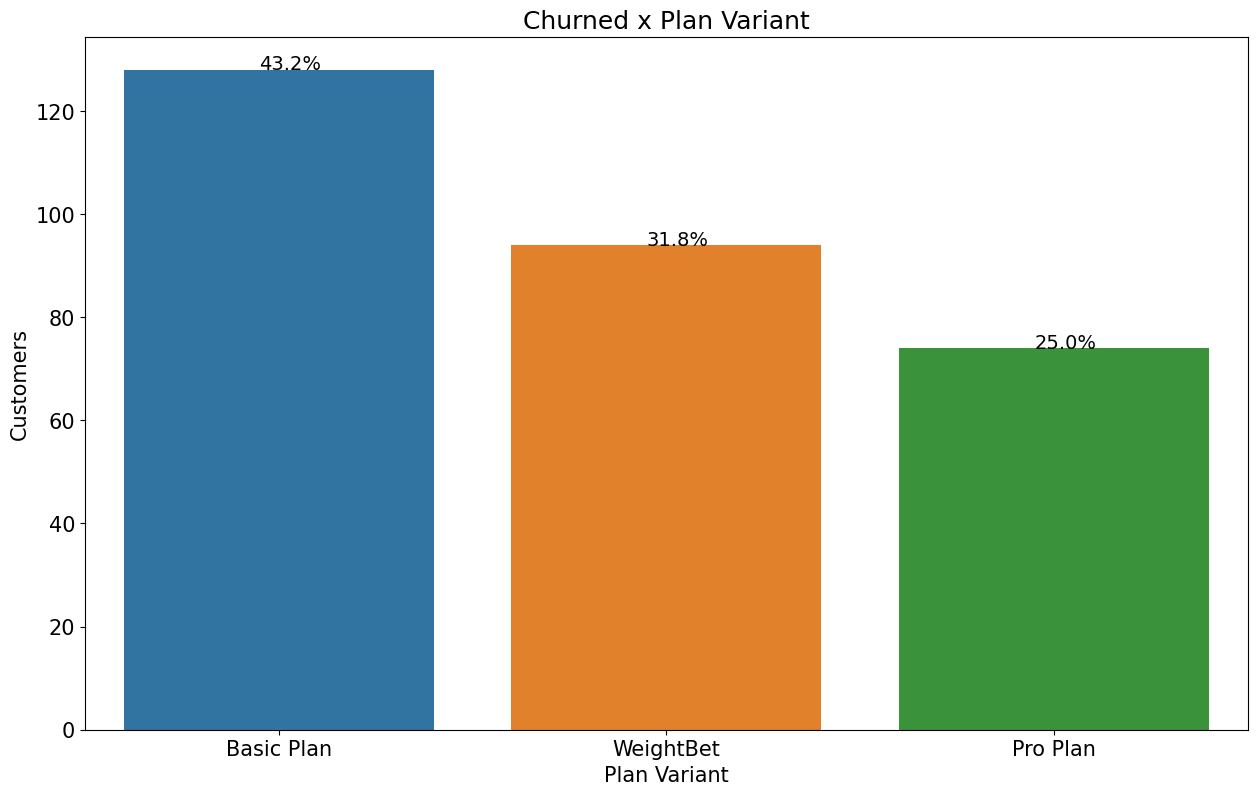

In [155]:
# Churn x Plan Variant
churned = df.query("Churned == 'Yes'")
plt.figure(figsize=(15,9))
ax = sns.countplot(x = 'FirstPlanVariantId',
                data = churned, order =churned['FirstPlanVariantId'].value_counts().index)
plt.ylabel('Customers', fontsize=15)
plt.xlabel('Plan Variant', fontsize = 15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Churned x Plan Variant', size = 18)
percent(ax, churned.FirstPlanVariantId)

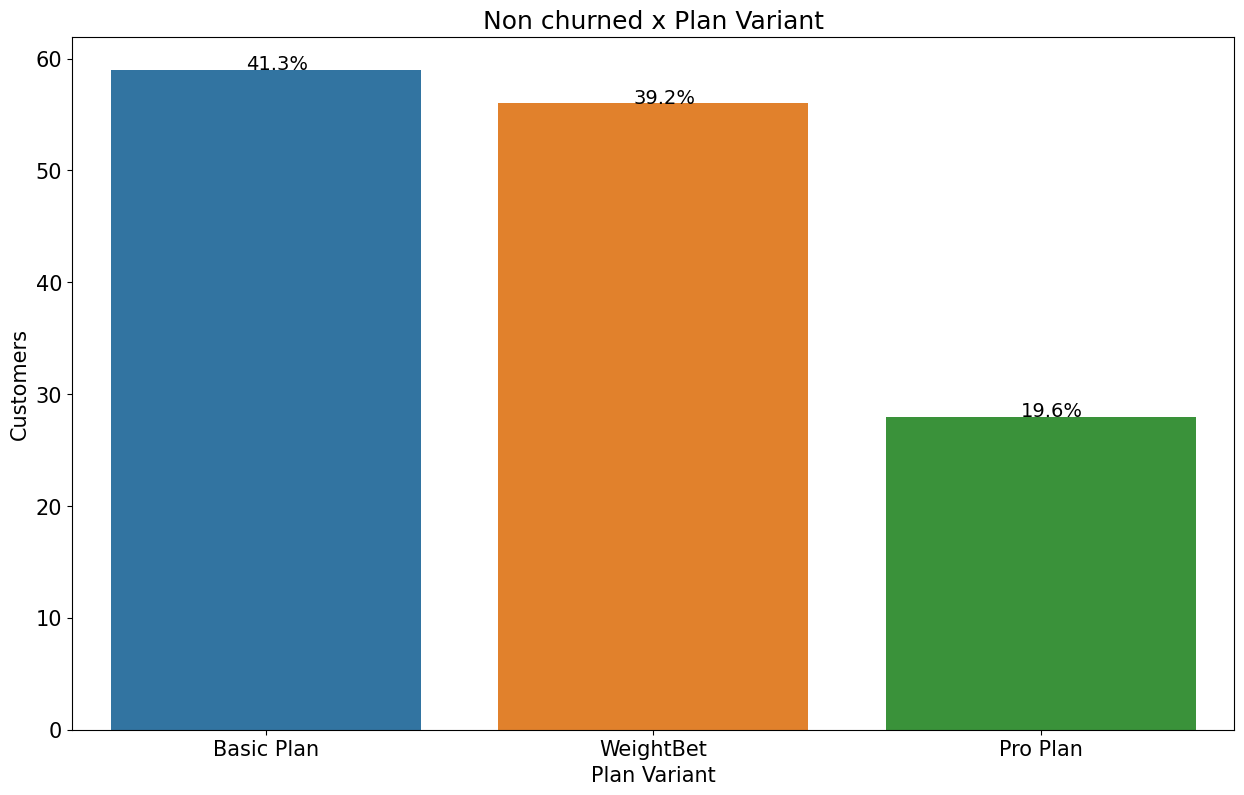

In [156]:
# Churn x Plan Variant
nonChurned = df.query("Churned == 'No'")
plt.figure(figsize=(15,9))
ax = sns.countplot(x = 'FirstPlanVariantId',
                data = nonChurned, order =nonChurned['FirstPlanVariantId'].value_counts().index)
plt.ylabel('Customers', fontsize=15)
plt.xlabel('Plan Variant', fontsize = 15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Non churned x Plan Variant', size = 18)
percent(ax, nonChurned.FirstPlanVariantId)

/var/folders/9v/c8y3pr_x3b55kgxmqmdysyqh0000gn/T/ipykernel_12823/1826556195.py:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

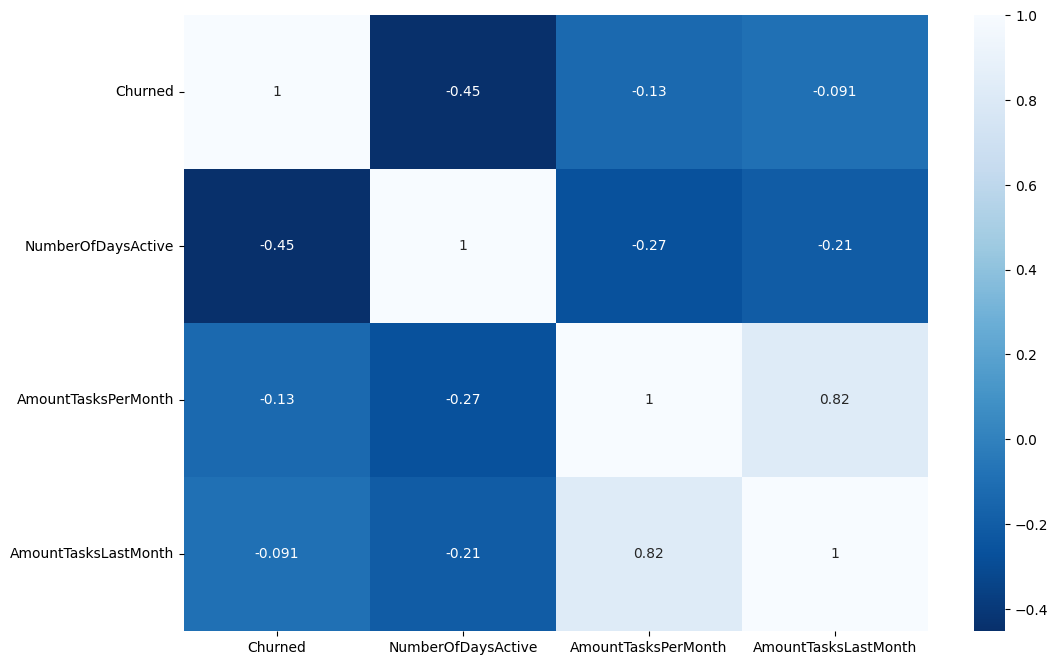

In [154]:
df_transformed = df.copy()
df_transformed.Churned = df_transformed.Churned.replace('Yes', 1)
df_transformed.Churned = df_transformed.Churned.replace('No', 0)

corr = df_transformed.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='Blues_r', annot=True)